In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from vae_tf import VariationalAutoencoder

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from util import random_mini_batches

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# batches 859
epoch 0
on iter 0, cost: -2569.943
on iter 250, cost: -202.517
on iter 500, cost: -180.584
on iter 750, cost: -174.020
epoch 1
on iter 0, cost: -160.967
on iter 250, cost: -162.734
on iter 500, cost: -168.826
on iter 750, cost: -166.109
epoch 2
on iter 0, cost: -157.885
on iter 250, cost: -162.654
on iter 500, cost: -158.332
on iter 750, cost: -158.475
epoch 3
on iter 0, cost: -167.022
on iter 250, cost: -155.211
on iter 500, cost: -158.298
on iter 750, cost: -158.019
epoch 4
on iter 0, cost: -144.858
on iter 250, cost: -159.187
on iter 500, cost: -146.800
on iter 750, cost: -158.875
epoch 5
on iter 0, cost: -151.389
on iter 250, cost: -144.397
on iter 500, cost: -151.453
on iter 750, cost: -150.417
epoch 6
on iter 0, cost: -155.302
on iter 250, cost: -149.705
on iter 500, cost: -150.137
on iter 750, cost: -146.364
epoch 7
on iter 0, cost: -156.142
on iter 250, cost: -151.951
on iter 500, cost: -142.684
on iter 750, cost: -151.531
epoch 8
on iter 0, cost: -149.162
on iter

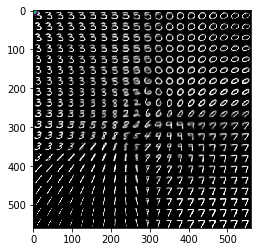

In [3]:
if __name__=='__main__':

    X_train = mnist.train.images
    #X_train = X_train/255
    X_train = (X_train>0.5).astype(np.float32)
    Y_train = mnist.train.labels
    
    X_test = mnist.test.images
    #X_test = X_test/255
    X_test = (X_test>0.5).astype(np.float32)
    Y_test = mnist.test.labels
    
    N, D = X_train.shape
    
    vae = VariationalAutoencoder(D, [200,100,2])
    init_op = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init_op)
        vae.set_session(sess)
        vae.fit(X_train)
        
        Z=vae.transform(X_test)
        plt.scatter(Z[:,0],Z[:,1],c=Y_test)
        
        #plot what image is reproduced for different parts of Z
        
        n = 20 #number of images per side
        x_values = np.linspace(-3,3,n)
        y_values = np.linspace(-3,3,n)
    
        image = np.empty((28*n,28*n))
    
        Z=[]
        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):
                z=[x, y]
                Z.append(z)
            
        X_recon = vae.prior_predictive_with_input(Z)
    
        k = 0
        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):  
                x_recon = X_recon[k]
                k+=1
            
                x_recon=x_recon.reshape(28,28)
                image[(n - i - 1) * 28:(n - i) * 28, j * 28:(j + 1) * 28] = x_recon
        plt.imshow(image,cmap='gray')
        plt.show()
            